In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


url = "https://breathecode.herokuapp.com/asset/internal-link?id=439&path=housing.csv"
df = pd.read_csv(url)


df = df[['Latitude', 'Longitude', 'MedInc']]


train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print(train_df.head())


       Latitude  Longitude  MedInc
14196     32.71    -117.03  3.2596
8267      33.77    -118.16  3.8125
17445     34.66    -120.48  4.1563
14265     32.69    -117.11  1.9425
2271      36.78    -119.80  3.5542


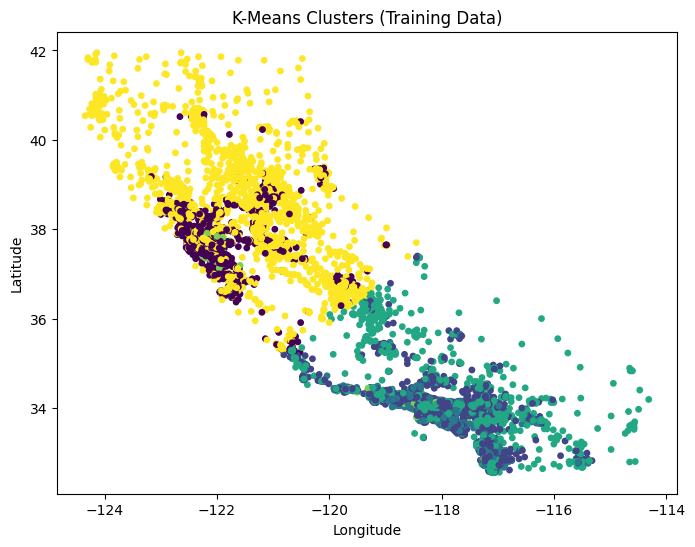

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=6, random_state=42)
train_clusters = kmeans.fit_predict(train_df)


train_df['cluster'] = train_clusters


plt.figure(figsize=(8,6))
plt.scatter(train_df['Longitude'], train_df['Latitude'],
            c=train_df['cluster'], cmap='viridis', s=15)
plt.title('K-Means Clusters (Training Data)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
%matplotlib inline
plt.show()


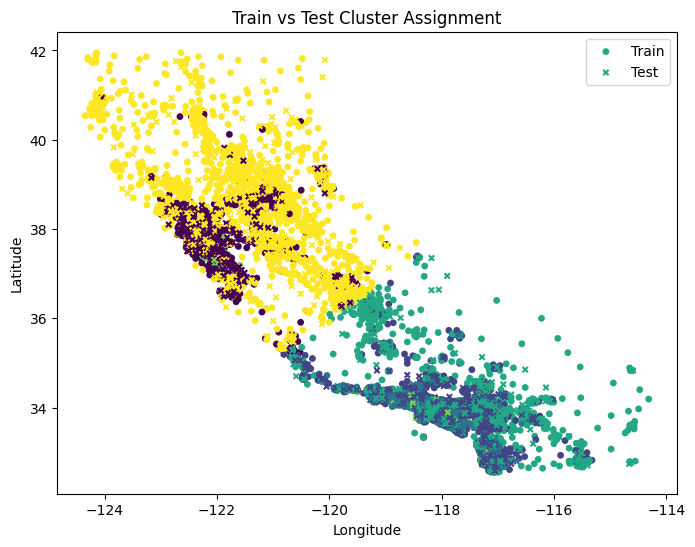

In [3]:
test_clusters = kmeans.predict(test_df)


test_df['cluster'] = test_clusters


plt.figure(figsize=(8,6))
plt.scatter(train_df['Longitude'], train_df['Latitude'],
            c=train_df['cluster'], cmap='viridis', s=15, label='Train')
plt.scatter(test_df['Longitude'], test_df['Latitude'],
            c=test_df['cluster'], cmap='viridis', s=15, marker='x', label='Test')
plt.title('Train vs Test Cluster Assignment')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
%matplotlib inline
plt.show()


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


X_train = train_df[['Latitude', 'Longitude', 'MedInc']]
y_train = train_df['cluster']

X_test = test_df[['Latitude', 'Longitude', 'MedInc']]
y_test = test_df['cluster']

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9958817829457365
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       561
           1       0.99      1.00      1.00       983
           2       0.99      1.00      1.00       299
           3       1.00      1.00      1.00      1111
           4       1.00      0.97      0.98        62
           5       1.00      0.99      1.00      1112

    accuracy                           1.00      4128
   macro avg       1.00      0.99      0.99      4128
weighted avg       1.00      1.00      1.00      4128



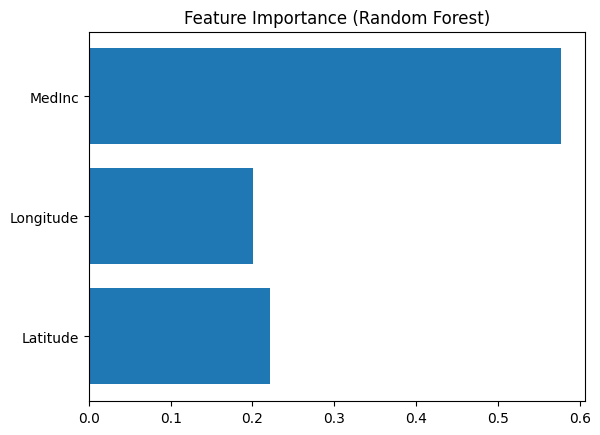

In [5]:
import numpy as np
plt.barh(X_train.columns, rf.feature_importances_)
plt.title('Feature Importance (Random Forest)')
%matplotlib inline
plt.show()


In [9]:
import os
import joblib


os.makedirs('models', exist_ok=True)


joblib.dump(kmeans, 'models/kmeans_model.pkl')
joblib.dump(rf, 'models/random_forest_model.pkl')

print("✅ Models saved successfully in the 'models' folder!")


✅ Models saved successfully in the 'models' folder!
